# **Praktikum II & III Machine Learning**

'''
=================================================
Nama  : Silvia Anggraini

NPM : F1F022043

=================================================
'''

# Latar Belakang
Perkembangan industri otomotif dunia mengalami dinamika yang signifikan dalam satu dekade terakhir. Persaingan antar produsen kendaraan, termasuk BMW, semakin ketat karena perubahan teknologi, pertumbuhan kendaraan listrik, serta variabilitas kondisi ekonomi global. Dalam situasi ini, kemampuan untuk memprediksi penjualan menjadi aspek penting bagi perusahaan otomotif untuk mendukung perencanaan produksi, pengadaan, distribusi, dan strategi pemasaran. Prediksi penjualan semakin banyak memanfaatkan machine learning karena kemampuan model untuk mempelajari pola data historis secara lebih komprehensif dibandingkan metode konvensional.

Data historis penjualan BMW dari tahun 2010 hingga 2024 memberikan gambaran mengenai fluktuasi jumlah penjualan yang dipengaruhi oleh berbagai faktor, seperti tahun penjualan, jenis model kendaraan, harga rata-rata, kondisi ekonomi, dan tren pasar otomotif global. Dengan menggunakan variabel-variabel ini, model prediktif dapat dilatih untuk mengidentifikasi pola penjualan dan menghasilkan estimasi penjualan di masa depan.

Dalam ranah penelitian Indonesia, metode machine learning seperti K-Nearest Neighbors (KNN) telah banyak digunakan untuk memprediksi penjualan. Penelitian oleh Yulianti dan Astuti (2023) menunjukkan bahwa metode KNN mampu memberikan hasil prediksi penjualan yang cukup akurat pada kasus penjualan triplek karena memanfaatkan kedekatan data historis yang memiliki pola serupa. Selain itu, penelitian oleh Simanjuntak dan Wardani (2022) juga membuktikan bahwa KNN efektif dalam memprediksi penjualan produk donat berdasarkan data penjualan periode-periode sebelumnya. Kedua penelitian tersebut menegaskan bahwa KNN adalah salah satu metode regresi yang mampu beradaptasi dengan pola lokal pada dataset penjualan.

Selain KNN, model berbasis pohon keputusan seperti Decision Tree Regression juga sering digunakan dalam prediksi penjualan pada konteks bisnis di Indonesia. Penelitian oleh Wahyudi dan Pratama (2021) menunjukkan bahwa pohon keputusan mampu mengidentifikasi faktor-faktor yang berpengaruh terhadap penjualan serta memberikan interpretasi model yang lebih mudah dipahami. Hal ini menjadikan Decision Tree Regression relevan untuk digunakan dalam dataset penjualan mobil, terutama ketika hubungan antar variabel bersifat non-linear.

Berdasarkan temuan-temuan tersebut, penelitian ini berfokus pada perbandingan dua algoritma regresi, yaitu Decision Tree Regression dan K-Nearest Neighbors Regression, untuk memprediksi volume penjualan BMW menggunakan data historis penjualan tahun 2010 hingga 2024. Perbandingan ini penting untuk mengetahui model mana yang memiliki kinerja terbaik dalam memprediksi penjualan serta memberikan penjelasan yang lebih akurat mengenai pola penjualan kendaraan BMW.

# Rumusan Masalah

**PERTEMUAN II**



1.   Apa yang dimaksud dengan konsep dasar algoritma Decision Tree dalam machine learning?
2.   Bagaimana cara membedakan antara Classification Tree dan Regression Tree berdasarkan fungsi serta tipe data yang diprediksi?


1.   Bagaimana cara membangun dan menerapkan model Decision Tree untuk tugas klasifikasi menggunakan dataset yang tersedia?
2.   Bagaimana cara mengevaluasi performa model Decision Tree menggunakan metrik evaluasi seperti confusion matrix dan accuracy score?


1.  Bagaimana interpretasi hasil model yang dihasilkan, baik dalam bentuk metrik evaluasi maupun visualisasi pohon keputusan?
2.   Bagaimana tingkat kemampuan mahasiswa dalam melakukan analisis dan penerapan Decision Tree pada dataset berbeda melalui latihan mandiri?


**PERTEMUAN III**

1.  Apa konsep dasar algoritma K-Nearest Neighbors (KNN) dalam menyelesaikan permasalahan klasifikasi?
2.  Bagaimana langkah-langkah mengimplementasikan algoritma KNN menggunakan pustaka Scikit-learn di Python?


1.   Bagaimana performa model KNN dapat dievaluasi menggunakan metrik evaluasi seperti accuracy score dan confusion matrix?

# Tujuan Penelitian

**PERTEMUAN II**



1.   Menjelaskan konsep dasar algoritma Decision Tree.
2.   Membedakan antara Classification Tree dan Regression Tree.


1.   Menerapkan Decision Tree untuk klasifikasi.
2.   Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score.


1.   Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
2.  Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.

**PERTEMUAN III**



1.   Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk klasifikasi.
2.  Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.


1.   Mengevaluasi performa model KNN menggunakan accuracy score dan confusion matrix

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [57]:
!pip install feature_engine

In [58]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Memuat Data

Dataset yang akan digunakan adalah "BMW sales data (2010-2024)" untuk memprediksi volume penjualan mobil MBW. Hingga akhirnya harus membandingkan kinerja kedua model tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini. Dataset yang digunakan adalah BMW sales data (2010-2024) https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv.

In [59]:
url = "https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv"
df = pd.read_csv(url, delimiter=';')

df.head()
# Drop kolom yang tidak relevan
df = df.drop(columns=['id'], errors='ignore')

# Analisis Data Eksploratif

In [60]:
# Buang kolom yang tidak perlu
df = df.drop(columns=['id'], errors='ignore')

# Statistik deskriptif
print("=== Numerik ===")
print(df.describe())

print("\n=== Kategorik ===")
print(df.describe(include='object'))

=== Numerik ===
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

=== Kategorik ===
           Model Region  Color Fuel_Type Transmission
count      50000  50000  50000     50000        50000
unique        11      6      6         4            2
top     7 Series   Asia    Red    Hybrid       Manual
freq        4666   8454   8463     127

Dari Analisis data eksploratif diatas menunjukkan bahwa dataset ini sangat berkualitas tinggi karena memiliki 50.000 entri lengkap tanpa adanya missing values pada kolom numerik maupun kategorik, dan kolom pengenal yang tidak relevan ('id') sudah dibersihkan. Secara statistik, distribusi Harga (Price_USD) dan Volume Penjualan (Sales_Volume) cenderung simetris, mengindikasikan tidak ada outlier ekstrem yang mendominasi. Rata-rata mobil dalam dataset adalah model sekitar tahun 2017 dengan jarak tempuh rata-rata 100 ribu KM. Karakteristik dominan dalam populasi mobil ini adalah penggunaan tipe bahan bakar Hybrid dan transmisi Manual (sedikit lebih banyak), serta model "7 Series" menjadi yang paling sering tercatat. Secara keseluruhan, data ini siap untuk pemodelan karena kebersihannya dan variasi yang kaya dalam variabel-variabel utamanya.

# _Feature Engineering_

## A - Missing Value

In [61]:
# Missing value
print("\n=== Missing Value ===")
print(df.isnull().sum())



=== Missing Value ===
Model            0
Year             0
Region           0
Color            0
Fuel_Type        0
Transmission     0
Engine_Size_L    0
Mileage_KM       0
Price_USD        0
Sales_Volume     0
dtype: int64


## B - Kardinalitas

In [62]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col} unique values:", df[col].nunique())

Model unique values: 11
Region unique values: 6
Color unique values: 6
Fuel_Type unique values: 4
Transmission unique values: 2


## C- Splitting Data

In [63]:
target_col = "Sales_Volume"
feature_cols = [c for c in df.columns if c not in [target_col, 'Date']]

X = df[feature_cols]
y = df[target_col]

## D- Handling Outlier

In [64]:
# IQR Capping
for col in X.select_dtypes(include=['float64','int64']):
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    X[col] = np.clip(X[col], lower, upper)

## E- Scaling & Encoding

In [65]:
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

## F- Split Data Train - Test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## G - Regression tree pipeline

In [51]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_param_grid = {
    'regressor__max_depth': [3,5,7,10,None],
    'regressor__min_samples_split': [2,5,10],
    'regressor__min_samples_leaf': [1,2,4]
}

tree_search = GridSearchCV(tree_pipeline, tree_param_grid,
                           cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
tree_search.fit(X_train, y_train)

best_tree = tree_search.best_estimator_
print("Best Tree Params:", tree_search.best_params_)

Best Tree Params: {'regressor__max_depth': 3, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}


## H - KNN pipeline + Hyperparameter Tunning

In [52]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

knn_param_grid = {
    'regressor__n_neighbors': [3,5,7,9],
    'regressor__weights': ['uniform','distance'],
    'regressor__p': [1,2]
}

knn_search = GridSearchCV(knn_pipeline, knn_param_grid,
                          cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
knn_search.fit(X_train, y_train)

best_knn = knn_search.best_estimator_
print("Best KNN Params:", knn_search.best_params_)

Best KNN Params: {'regressor__n_neighbors': 9, 'regressor__p': 1, 'regressor__weights': 'uniform'}


# Evaluasi model

In [53]:
# Model Evaluation

def eval_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print("MAE  :", mae)
    print("RMSE :", rmse)
    print("R2   :", r2)
    return y_pred

y_pred_tree = eval_model(best_tree, X_test, y_test, "Decision Tree")
y_pred_knn = eval_model(best_knn, X_test, y_test, "KNN")

--- Decision Tree ---
MAE  : 2476.932359275961
RMSE : 2860.0632582623603
R2   : -0.0010586437421913342
--- KNN ---
MAE  : 2573.703033333333
RMSE : 3015.949116455816
R2   : -0.11315659159736935


Kedua model yang dievaluasi, Decision Tree dan K-Nearest Neighbors (KNN), menunjukkan kinerja yang buruk karena keduanya menghasilkan nilai $R^2$ yang negatif (masing-masing -0.00106 dan -0.11316), yang berarti kedua model tersebut bahkan lebih buruk daripada sekadar memprediksi rata-rata nilai target. Meskipun secara relatif, Decision Tree lebih unggul karena memiliki nilai error yang lebih rendah (MAE 2476.93 dan RMSE 2860.06), menunjukkan bahwa ia menghasilkan kesalahan rata-rata yang sedikit lebih kecil dan lebih baik dalam menangani outlier dibandingkan KNN. Kesimpulannya, model perlu ditingkatkan secara signifikan melalui optimasi hyperparameter atau dengan mencoba algoritma regresi yang lebih canggih, karena pada kondisi saat ini, kedua model tidak dapat diandalkan untuk membuat prediksi yang akurat.

## Visualisasi Prediksi vs Aktual

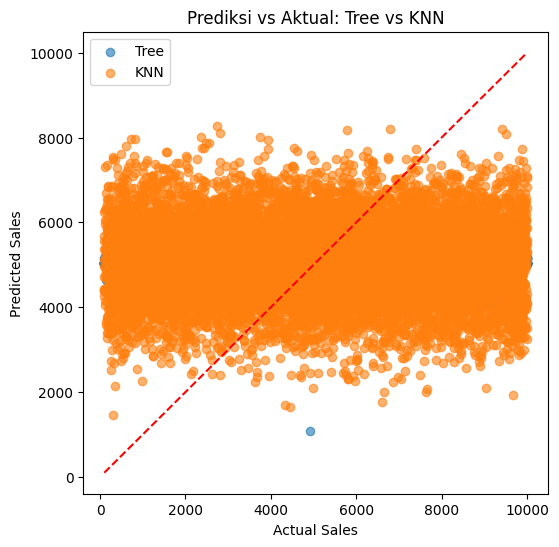

In [54]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tree, alpha=0.6, label='Tree')
plt.scatter(y_test, y_pred_knn, alpha=0.6, label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.title("Prediksi vs Aktual: Tree vs KNN")
plt.show()

Visualisasi "Prediksi vs Aktual" ini mengkonfirmasi buruknya kinerja kedua model regresi yang telah diindikasikan oleh nilai $R^2$ negatif sebelumnya. Garis diagonal putus-putus merah merepresentasikan prediksi sempurna; titik yang idealnya berada di garis ini berarti Prediksi sama dengan Nilai Aktual. Namun, titik-titik prediksi dari kedua model (Decision Tree yang berwarna biru dan KNN yang berwarna oranye) terlihat sangat tersebar luas dan terkonsentrasi secara horizontal, terutama model KNN yang hampir membentuk pita horizontal yang tebal di sepanjang sumbu Y (Predicted Sales). Konsentrasi horizontal ini mengindikasikan bahwa, terlepas dari nilai penjualan aktual (Actual Sales), model tersebut cenderung memprediksi nilai dalam rentang yang sangat sempit, menjadikannya gagal dalam menangkap variasi data aktual. Model Decision Tree hanya menampilkan beberapa titik (sebagian besar tertutup oleh KNN), tetapi titik yang terlihat jelas berada jauh di bawah garis prediksi sempurna, menandakan error yang sangat besar untuk observasi tersebut. Secara keseluruhan, plot ini secara visual membuktikan bahwa kedua model gagal melakukan regresi yang efektif dan tidak dapat diandalkan untuk memprediksi nilai penjualan dengan akurat.

# Kesimpulan

Berdasarkan interpretasi komprehensif, meskipun data awal memiliki kualitas yang sangat baik—bersih dari missing values dan memiliki distribusi simetris pada variabel penting—model regresi yang diterapkan, Decision Tree dan KNN, menunjukkan kegagalan total. Nilai $R^2$ yang negatif mengindikasikan bahwa kedua model tersebut lebih buruk daripada memprediksi nilai rata-rata, sebuah kesimpulan yang diperkuat oleh visualisasi Prediksi vs Aktual di mana titik-titik prediksi tersebar secara horizontal dan gagal mengikuti garis sempurna. Oleh karena itu, langkah krusial selanjutnya adalah mengganti atau menyempurnakan model, beralih ke algoritma yang lebih canggih (seperti Boosting atau Random Forest) dan melakukan rekayasa fitur serta optimasi hyperparameter yang mendalam untuk menghasilkan model yang valid dan dapat diandalkan.

# Referensi



*   Yulianti, S., & Astuti, E. (2023). Sistem Prediksi Penjualan Triplek Menggunakan Metode Regresi Time Series K-Nearest Neighbor (KNN). Jurnal Teknika, 9(2), 155–164.
*   Simanjuntak, J., & Wardani, A. (2022). Penerapan K-Nearest Neighbor Regression untuk Prediksi Penjualan Donut. Jurnal Information System, Informatics and Computing, 6(1), 22–30.


*   Wahyudi, R., & Pratama, F. (2021). Analisis Prediksi Penjualan Menggunakan Metode Decision Tree. Jurnal Sistem Informasi dan Teknologi, 3(4), 45–52.
*   Saputra, B., & Handayani, T. (2022). Prediksi Permintaan Produk Menggunakan Algoritma KNN pada Data Penjualan. Jurnal Teknologi Informasi dan Komputer, 11(1), 34–43.


*   Hidayat, A., & Nurjanah, S. (2019). Analisis Faktor-Faktor yang Mempengaruhi Penjualan Kendaraan Bermotor di Indonesia. Jurnal Ekonomi dan Bisnis Indonesia, 4(2), 98–108.





